In [53]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [51]:
df = pd.read_csv('data/train.csv', encoding='ISO-8859-1', low_memory=False)

In [61]:
df.head(5)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [54]:
scaler = StandardScaler()

In [57]:
b = df['balance_due'].values
b = b.reshape(b.shape[0], 1)

In [58]:
scaler.fit_transform(b).min()

-13.147334652567258

In [59]:
df['balance_due'].describe()

count    250306.000000
mean        222.449058
std         606.394010
min       -7750.000000
25%           0.000000
50%          25.000000
75%         305.000000
max       11030.000000
Name: balance_due, dtype: float64

In [60]:
x = df[df['balance_due'] > 0]['balance_due']
x1 = np.sqrt(x)

x1.mean() - x1.median()

-0.45259606090997195

## Задание 12.6

Загрузите данные `train.csv`, найдите признак, обозначающий баланс и признак, обозначающий размер скидки. Создайте полиномиальные признаки степени 3. Посчитайте среднее значение для каждого получившегося признака. В качестве ответа укажите номер признака, который содержит максимальное среднее значение.

In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [98]:
pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(df[['balance_due', 'discount_amount']])
poly_features

array([[  1., 305.,   0., ...,   0.,   0.,   0.],
       [  1.,  75.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.]])

In [70]:
poly_features[:, 0].mean()

1.0

In [71]:
poly_features[:, 1].mean()

222.44905795306545

In [72]:
poly_features[:, 2].mean()

0.12516679584188953

In [73]:
poly_features[:, 3].mean()

417195.80993348145

In [74]:
poly_features[:, 4].mean()

-9.85531709187954

In [75]:
poly_features[:, 5].mean()

11.781739151278835

In [76]:
poly_features[:, 6].mean()

2042000980.3445697

In [77]:
poly_features[:, 7].mean()

117924.38420772974

In [79]:
poly_features[:, 8].mean()

-149.56407357394548

In [80]:
poly_features[:, 9].mean()

3074.1760485166155

## Задание 12.7

Загрузите данные `train.csv`, найдите признак, обозначающий дату, когда был выписан штраф. Найдите, сколько раз штраф был выписан на выходных и запишите это число в качестве ответа.

In [94]:
x = pd.to_datetime(df['ticket_issued_date'])

<AxesSubplot:>

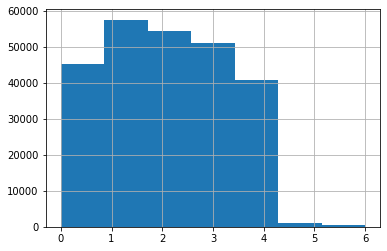

In [95]:
x.dt.weekday.hist(bins=7)

In [96]:
df[x.dt.weekday >= 5].shape

(1620, 34)

## Задание 14.5

Загрузите данные `train.csv`, найдите признак, обозначающий баланс. Уберите пропуски из этого признака и найдите выбросы с помощью межквартильного расстояния. Найдите модуль разницы между минимальным и максимальным выбросом.

<AxesSubplot:>

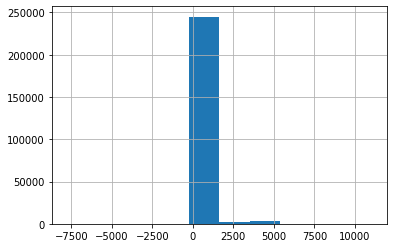

In [103]:
df['balance_due'].hist()

In [105]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)

    return np.where((ys > upper_bound) | (ys < lower_bound))[0]

In [109]:
x = df['balance_due'].dropna()
o = outliers_iqr(x)

balance = x[o]
np.max(balance) - np.min(balance)

18780.0